# Assignment 3: Logistic Regression on data set of our choosing

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv('data/bank_marketing.csv', index_col=0)

Bank_marketing dataset: the binary classification goal is to predict if the client will subscribe a bank term deposit (variable y)

#### Explore the dataset: EDA
1. Get an understanding of the data
2. Look at basic statistics: groupby, count_values, describe, info, etc.
3. Are there missing values?
4. What's the correlation between different columns --> heatmap
5. What's my target field going to be?
6. Simple visualizations: boxplot, scatterplot, barcharts, etc.
7. Feature engineering 
    - Make dummy variables
    - Make categorical features into numeric features (month, education, day_of_week)
    

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

- We know that all of the values are not null from the df.info 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [21]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [22]:
df.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [26]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [14]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [16]:
#Percent that subsribed: y = 1
subscribed = 4640 / (4640 + 36548)
subscribed

0.11265417111780131

In [17]:
#Percent that did not subscribe: 1 - y
not_subscribed = 1 - subscribed
not_subscribed

0.8873458288821987

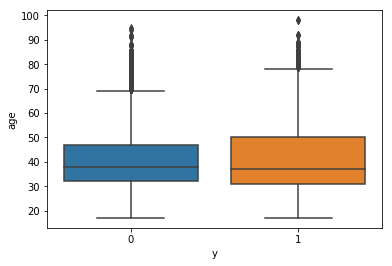

In [23]:
sns.boxplot(x = 'y', y = 'age', data = df)

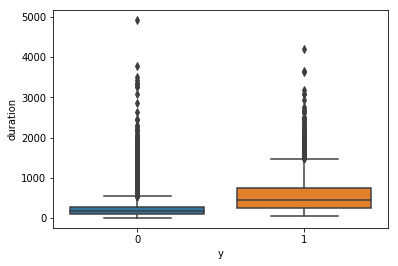

In [25]:
sns.boxplot(x = 'y', y = 'duration', data = df)

In [33]:
df.month.unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [34]:
#ames = ames.replace({"GarageCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})
df = df.replace({"month": {"mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}})

In [35]:
df.month.unique()

array([ 8, 11,  6,  4,  7,  5, 10,  3,  9, 12])

In [37]:
df.describe()

,age,month,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.607896,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.040998,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,3.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,5.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,6.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,8.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,12.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [38]:
df.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [40]:
df = df.replace({"poutcome": {"nonexistent": 2, "success": 1, "failure": 0}})

**Choose the numeric columns from the initial dataset (now inclusive of the categorical columns that were converted to numeric categories)**

In [11]:
df_numeric = df.select_dtypes(include = 'int64')

In [12]:
X = df_numeric.drop('y', axis = 1)
y = df.y

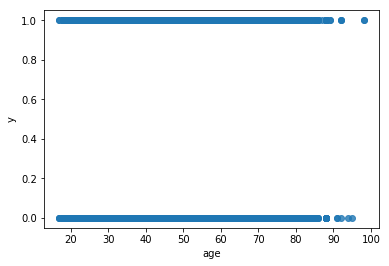

In [51]:
sns.regplot(x=df['age'], y=df['y'], fit_reg=False)

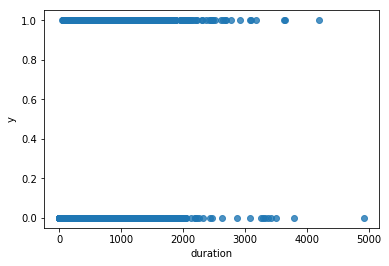

In [53]:
sns.regplot(x=df['duration'], y=df['y'], fit_reg=False)

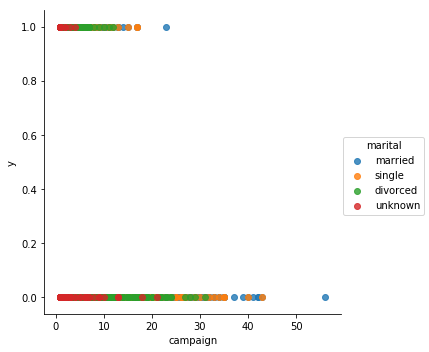

In [65]:
sns.lmplot(x= "campaign", y= "y",  hue = "marital", data = df, fit_reg= False)

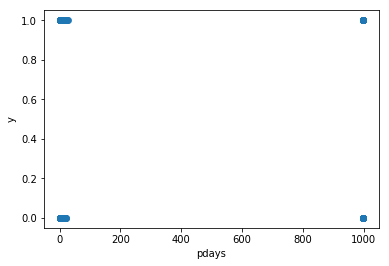

In [56]:
sns.regplot(x=df['pdays'], y=df['y'], fit_reg=False)

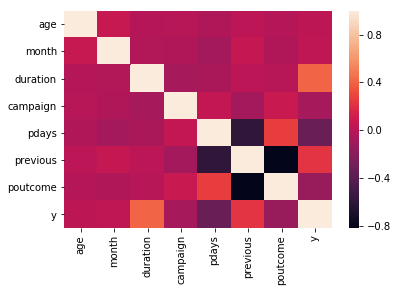

In [69]:
corr = df_numeric.corr()
plt.figure()
sns.heatmap(corr)

- Correlation between the y value and: 
    1. **Duration**
    2. **Previous**
* No correlation between duration and previous --> no collinearity which is good
* Choosing my X to be duration and previous

### Framing the Classification Problem

- Trying to figure out what the best indicators are to predict y i.e. what are the best indicators to predict whether or not a bank client has subscribed a term deposit after a marketing campaign, and outreach via cell phones/telephones, etc.



## Regression Process

**1. select features to include in the model**

**2. add a couple features? feature engineering**

**3. build a model (what are the right parameters--choosing the right C-value) **

**4. lasso vs. ridge vs. elastic**

**5. what do we care about? precision, recall or accuracy?**

**6. how do we optimize this afterward? **

### Logistic Regression

In [142]:
X = df_numeric[['duration', 'previous']]
y = df.y

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression(class_weight={0 : 0.887, 1: 0.113})
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.887, 1: 0.113}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [144]:
clf.intercept_

array([-5.2025672])

In [145]:
clf.coef_

array([[0.00267127, 0.87651161]])

In [146]:
clf.score(X_test, y_test)

0.8881227542002526

In [152]:
pred = clf.predict(X_test)

In [153]:
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     10272
          1       0.01      0.60      0.03        25

avg / total       1.00      0.89      0.94     10297



### DummyClassifier

"DummyClassifier: use the dummy classifier to generate a baseline estimation that only guesses the majority class everything regardless of the data --> Similar to examining the baseline of a dataset"

In [147]:
from sklearn.dummy import DummyClassifier

In [148]:
dum = DummyClassifier(strategy='most_frequent')

In [149]:
dum.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [150]:
dum.score(X_train, y_train)

0.8872487132174419

In [151]:
d_pred = dum.predict(X_train)

- Here the dummy classifier is only **SLIGHTLY** worse than the LogisticRegression
    - Logistic Regression Score = **.889**
    - Dummy Classifier Score = **.887**

### KNN

"Now, we want to assign $y$-values based on the nearest $k$ neighbors. Plotting the result of two iterations with different values for $k$ surfaces important considerations."

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
X = df_numeric[['duration', 'previous']]
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
regress = KNeighborsRegressor(n_neighbors=3)
regress2 = KNeighborsRegressor(n_neighbors=10)

In [16]:
regress.fit(X_train, y_train)
regress2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [17]:
pred_3 = regress.predict(X_test)
pred_10 = regress2.predict(X_test)

In [18]:
print('Error with 3 is', np.sqrt(mean_squared_error(pred_3, y_test)), 'and 10 is', np.sqrt(mean_squared_error(pred_10, y_test)))


Error with 3 is 0.3137217412233847 and 10 is 0.2867454926695125


### Improve the Model by Using GridSearch on KNN and C in Logistic Regression

Need to include a **scale** transformation in pipeline for KNN and **Polynomial Features** step in Logistic Model

In [20]:
params = {'n_neighbors': [i for i in range(3, 10)]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring = 'neg_mean_squared_error')

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [22]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [31]:
best = grid.best_estimator_

In [30]:
best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [29]:
pred = best.predict(X_test)
pred

array([0.11111111, 0.11111111, 0.        , ..., 0.        , 0.        ,
       0.        ])

### Extra Credit: 
- **SGDClassifier**
- **AUC and ROC curves**
- Regularization (Lasso, Ridge, Elastic)